### MODELOS DE CLASIFICACION XGBOOST, CATBOOST Y RANDOM FOREST / MATRIZ DE CONFUSION
###CASO IDENTIFICAR FALLAS POR LOS PICOS DE INTENSIDAD QUE PRESENTAN

### **1.Instalación de Librerias**



In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9) #TAMANOS DE GRAFICOS
plt.style.use('ggplot') #ESTILO GRAFICO

from sklearn import tree # ARBOL DE DECISION
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #METRICA DE ACCURACY
from sklearn.model_selection import KFold,cross_val_score


from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [ ]:
data = pd.read_csv('Caso_Picos_Intensidad.csv',sep=",") #LEER ARCHIVO CSV

In [ ]:
df=data #ARTIFICIO DF=DATA

In [ ]:
df.head() #VIAUALIZACION

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,316,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,317,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,318,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,319,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,320,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [ ]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True) #funcion DROP PARA BORRAR

In [ ]:
df=df.astype(float).round(2) #DEFINIR VARIABLE A NUMEROS DECIMALES O CONTINUOS,
#REDONDEAR ROUND A 2 DECIMALES

In [ ]:
df.head()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [ ]:
# Revision descriptiva ANALITICA DESCRIPTIVA
df.describe()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,6015.786763,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024,0.104835
std,134.324754,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976,0.306351
min,5566.500000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000,0.000000
25%,5946.590000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000,0.000000
50%,6032.640000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000,0.000000
75%,6104.040000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000,0.000000
max,6483.500000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000,1.000000


In [ ]:
df.shape #shape para ver dimensiones de filas y columnas

(14375, 8)

In [ ]:
df['picos_intens'].value_counts() #EVALUAR VARIABLE OBJETIVO
# TIENE COMO PROPORCION DE 9 A 1

,count
picos_intens,
0.0,12868
1.0,1507


In [ ]:
df.head() #EXPLORACION DE DATO

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [ ]:
data=df

### **3. Exploracion de datos**

In [ ]:
# Exploracion inicial
data.head()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [ ]:
# Revision de la vriables individuales
data.describe()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,6015.786763,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024,0.104835
std,134.324754,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976,0.306351
min,5566.500000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000,0.000000
25%,5946.590000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000,0.000000
50%,6032.640000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000,0.000000
75%,6104.040000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000,0.000000
max,6483.500000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000,1.000000


In [ ]:
# identificando valores Nulos
data.isnull().sum().sort_values(ascending=False)

,0
Presion,0
Tonelaje,0
Velocidad,0
%Solidos,0
Potencia,0
F80,0
Brazo,0
picos_intens,0


In [ ]:
data.columns #VER COLUMANAS

Index(['Presion', 'Tonelaje', 'Velocidad', '%Solidos', 'Potencia', 'F80',
       'Brazo', 'picos_intens'],
      dtype='object')

In [ ]:
# Dimensiones de la tabla de modelamiento (fila, Columna)
data.shape

(14375, 8)

In [ ]:
# Detección del desbalance de la muestras GROUPBY
data.groupby('picos_intens').size()

,0
picos_intens,
0.0,12868
1.0,1507


In [ ]:
# DIVISION DE CONTEO DE DATOS 1 Y 0 ,   1507/14375   DATOS 1 /TOTAL
round(1507 / 14375,4)

0.1048

In [ ]:
#NORMALIACION =.% DE DATOS 12868/14375 Y 1507/14375
round(data.picos_intens.value_counts(normalize=True),4)

,proportion
picos_intens,
0.0,0.8952
1.0,0.1048


Class 0 Intensidad_Normal: 12868
Class 1 Intensidad_Pico: 1507
Proporción: 8.54 : 1


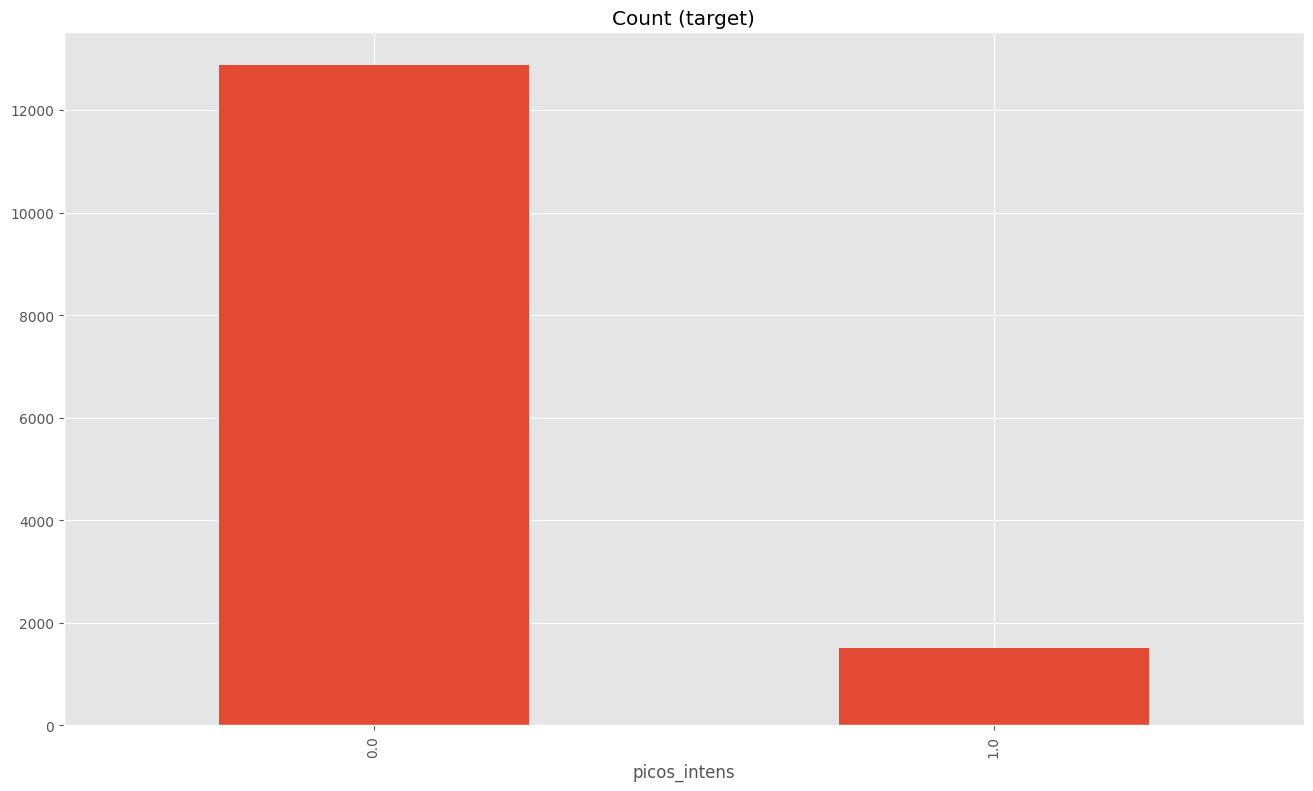

In [ ]:
# Detección del desbalance de la muestras
target_count = data.picos_intens.value_counts() #CONTEO DE CLASES
print('Class 0 Intensidad_Normal:', target_count[0])#IMPRIME CONTEO 0
print('Class 1 Intensidad_Pico:', target_count[1])#IMPRIME CONTEO 1
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1') #DIVISION 0/1
target_count.plot(kind='bar', title='Count (target)'); #TIPO DE GRAFICO

### **4. Separando una muestra para verificar resultado de estrategias de muestreo**

In [ ]:
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = data[['Presion',  'Tonelaje', 'Velocidad','%Solidos', 'Potencia', 'F80', 'Brazo']]#VARIABLES INDEPENDIENTES
y = data[['picos_intens']]

import sklearn.model_selection as model_selection #LIBRERIA MACHINE LEARNING
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.35,random_state=42)
# test SOLO PUEDE TENER DE 35 A 25 %

### **5. Evaluando la escenarios de modelamiento XGBoost**
### TECNICAS ESTADISTICAS


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier() # MALA PRACTICA faltan parametros

In [ ]:
# parameters tunning
# XGB tunning
model2 = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)
#CON PARAMETROS /          20  ESTIMADOS, PROFUNDIDAD 8, TASA APRENDIZAJE 0.1, MUESTRA DE 50% DE DATA SET

In [ ]:
!pip install catboost #MODELO FAMILA GXBOST

In [ ]:
import catboost
from catboost import CatBoostClassifier

In [ ]:
#Train the XGboost Model for Classification
model3 = CatBoostClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier #CREACION MODELO RANDOM FOREST

In [ ]:
#Train the XGboost Model for Classification
model4 = RandomForestClassifier() #MALA PRACTICA
#SIN PARAMETROS

In [ ]:
# parameters tunning
# RF tunning
model5 = RandomForestClassifier(n_estimators=20, max_depth=8)
# CON PARAMETROS                20 ESTIAMDORES 8 PROFUNDIDAD

In [ ]:
!pip install --upgrade scikit-learn
!pip install scikit-learn==1.5.2 #Replace with suitable version for xgboost
import os
os._exit(00)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
model1.fit(X_train, y_train) #ENTRENAMIENTO DE MODELOS GXBOST

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model2.fit(X_train, y_train) #XGB PRAMETRIZADO

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model3.fit(X_train, y_train) #ENTRENAMIENTO DE CAT

Learning rate set to 0.02675
0:	learn: 0.6397679	total: 51.1ms	remaining: 51.1s
1:	learn: 0.5914018	total: 55.3ms	remaining: 27.6s
2:	learn: 0.5445790	total: 59.3ms	remaining: 19.7s
3:	learn: 0.5037461	total: 63.4ms	remaining: 15.8s
4:	learn: 0.4641864	total: 67.6ms	remaining: 13.5s
5:	learn: 0.4296169	total: 71.8ms	remaining: 11.9s
6:	learn: 0.4004173	total: 77ms	remaining: 10.9s
7:	learn: 0.3755289	total: 81.2ms	remaining: 10.1s
8:	learn: 0.3506509	total: 85.5ms	remaining: 9.41s
9:	learn: 0.3296770	total: 89.7ms	remaining: 8.88s
10:	learn: 0.3100769	total: 94.2ms	remaining: 8.47s
11:	learn: 0.2920043	total: 98.1ms	remaining: 8.08s
12:	learn: 0.2767872	total: 102ms	remaining: 7.76s
13:	learn: 0.2618043	total: 107ms	remaining: 7.51s
14:	learn: 0.2488392	total: 111ms	remaining: 7.26s
15:	learn: 0.2384063	total: 115ms	remaining: 7.07s
16:	learn: 0.2264868	total: 119ms	remaining: 6.88s
17:	learn: 0.2178713	total: 123ms	remaining: 6.71s
18:	learn: 0.2095829	total: 127ms	remaining: 6.57s
19

In [ ]:
model4.fit(X_train, y_train) #ENTRENAMIENTO DE RANDOM FOREST

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
model5.fit(X_train, y_train) #ENTRENAMIENTO DE MODELOS RANDOM FOREST PARAMETROS

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [ ]:
### MODELO DE DECISION**

In [ ]:
# Agregabdo un clasificador de arbol simple
from sklearn.tree import DecisionTreeClassifier

model6 = DecisionTreeClassifier()
model6.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:

import sklearn
sklearn.__version__

'1.5.2'

In [ ]:
# PREDICCIONES PARA X_TEST Y CONSEGUIR EL MEJOR MODELO
from sklearn.metrics import classification_report

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)

In [ ]:
pred1 #IMPRIME PREDICCION EN ARRAY

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)


array([[4471,   49],
       [ 105,  407]])

In [ ]:
#407/49+407    REALL
#FORMULA DE MATRIZ DE CONFUSION

In [ ]:
# XGB
print(classification_report(y_test,pred1)) #REPORT DE CLASIFICACION DE MATRIZ CONFUSION

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.89      0.79      0.84       512

    accuracy                           0.97      5032
   macro avg       0.93      0.89      0.91      5032
weighted avg       0.97      0.97      0.97      5032



In [ ]:
# XGB Tuneado
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      4520
         1.0       0.94      0.69      0.79       512

    accuracy                           0.96      5032
   macro avg       0.95      0.84      0.89      5032
weighted avg       0.96      0.96      0.96      5032



In [ ]:
# Catboost
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.92      0.78      0.84       512

    accuracy                           0.97      5032
   macro avg       0.95      0.88      0.91      5032
weighted avg       0.97      0.97      0.97      5032



In [ ]:
# Random Forest
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.92      0.79      0.85       512

    accuracy                           0.97      5032
   macro avg       0.95      0.89      0.91      5032
weighted avg       0.97      0.97      0.97      5032



In [ ]:
# Random Forest Tuneado
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4520
         1.0       0.95      0.68      0.79       512

    accuracy                           0.96      5032
   macro avg       0.96      0.84      0.89      5032
weighted avg       0.96      0.96      0.96      5032



In [ ]:
# Arbol de Decision
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4520
         1.0       0.83      0.80      0.82       512

    accuracy                           0.96      5032
   macro avg       0.90      0.89      0.90      5032
weighted avg       0.96      0.96      0.96      5032



In [ ]:
df = pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','Catboost','RF','RF Tuneado','Arbol de Decision'],
                   'precision' : [0.90, 0.91, 0.92,0.92,0.96,0.81],
                   'recall' : [0.80, 0.72, 0.78,0.79,0.69,0.79]})

In [ ]:
df # QUE MODELO SE UTILIZA PRESICION PARA TRABAJADOR EXTERNO PARA REVISION MAQUINA BAJAR COSTOS
# MODELO RECALL CON PERSONAL INTERNO PORQUE HAY MARGEN DE EQUIVOCACION PERO YA ESTA AHI EL COSTO EN EL SUELDO
#TIENE QUE REVISARLO POR MANTENIENTO PREVENTIVO

,algorithm,precision,recall
0,XGBoost,0.90,0.80
1,XGBoost Tuneado,0.91,0.72
2,Catboost,0.92,0.78
3,RF,0.92,0.79
4,RF Tuneado,0.96,0.69
5,Arbol de Decision,0.81,0.79


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test, pred3) * 100))
print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4) * 100))
print("Accuracy for model 5: %.2f" % (accuracy_score(y_test, pred5) * 100))
print("Accuracy for model 6: %.2f" % (accuracy_score(y_test, pred6) * 100))

Accuracy for model 1: 96.94
Accuracy for model 2: 96.38
Accuracy for model 3: 97.06
Accuracy for model 4: 97.08
Accuracy for model 5: 96.40
Accuracy for model 6: 96.28


Matriz de Confusión MODELO GANADOR:
 [[4503   17]
 [ 164  348]]
Métricas de Matriz de Confusión - MODELO GANADOR:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4520
         1.0       0.95      0.68      0.79       512

    accuracy                           0.96      5032
   macro avg       0.96      0.84      0.89      5032
weighted avg       0.96      0.96      0.96      5032



<ipython-input-73-fab6acd0407e>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)# establecen las etiquetas de los ejes x e y, respectivamente.
<ipython-input-73-fab6acd0407e>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


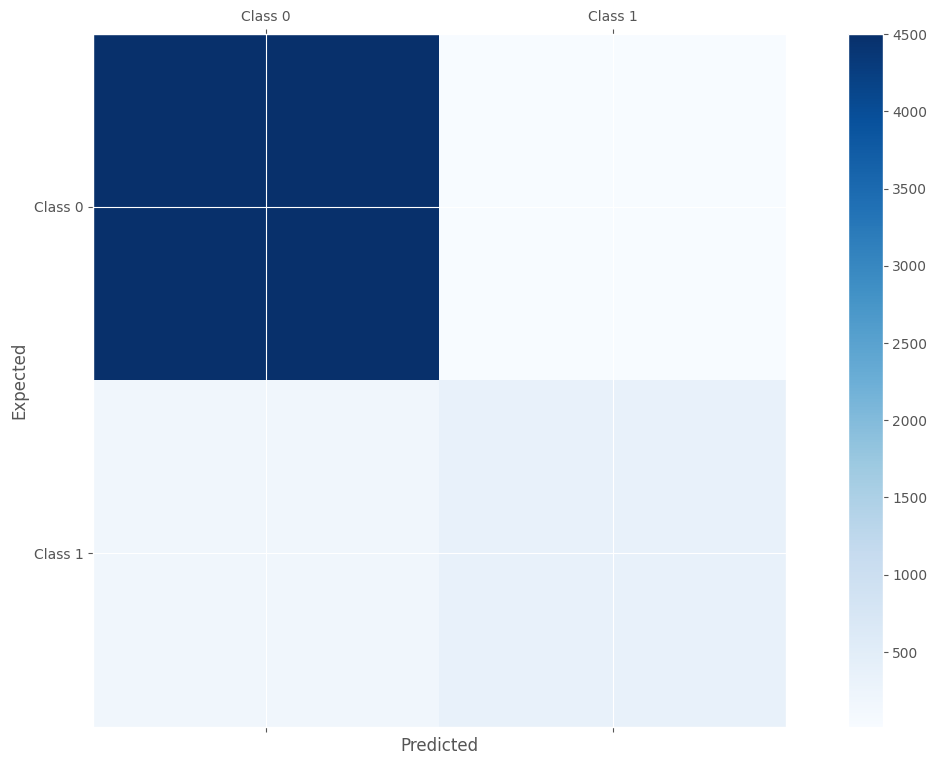

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred5) ##Modificar al modelo
#--------------------------------------------------------------------

print('Matriz de Confusión MODELO GANADOR:\n', conf_mat)

print('Métricas de Matriz de Confusión - MODELO GANADOR:\n',classification_report(y_test,pred5))

labels = ['Class 0', 'Class 1']#e definen las etiquetas para las clases (en este caso, Class 0 y Class 1).
fig = plt.figure()#Se crea una figura y un eje para la visualización
ax = fig.add_subplot(111)#visualiza la matriz de confusión como una imagen, utilizando un mapa de colores
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)#visualiza la matriz de confusión como una imagen
fig.colorbar(cax)#añade una barra de color a la figura para indicar la escala de valores
ax.set_xticklabels([''] + labels)# establecen las etiquetas de los ejes x e y, respectivamente.
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')#añaden etiquetas a los ejes.
plt.ylabel('Expected')#añaden etiquetas a los ejes.
plt.show()

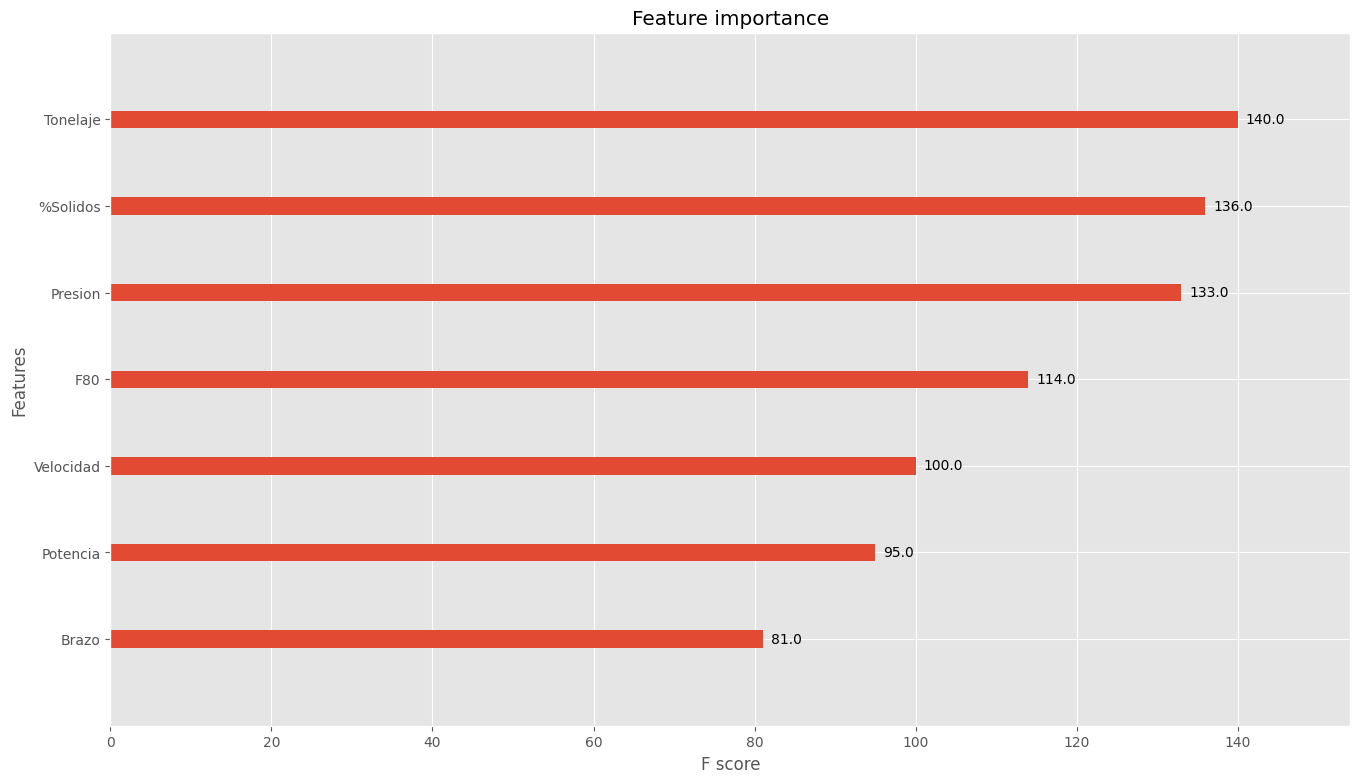

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model2)#GENERAR LAS VARIABLES MAS IMPORTANTES PARA EL MODELO XGBOOST
pyplot.show()